### Load the standard libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Load the data

In [5]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


<Axes: xlabel='Class', ylabel='count'>

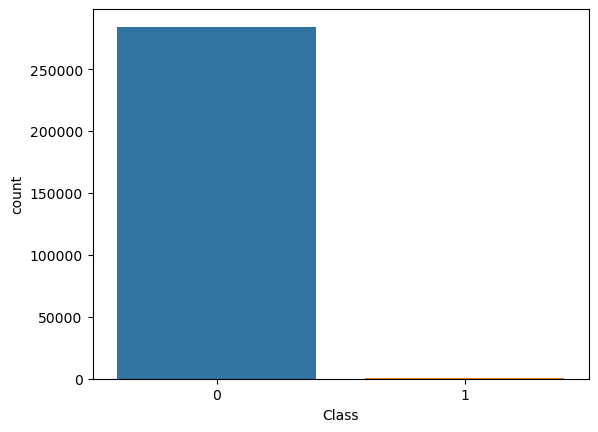

In [6]:
sns.countplot(x = 'Class', data = data)

In [7]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [8]:
data['Class'].value_counts(normalize = True)  * 100

0    99.827251
1     0.172749
Name: Class, dtype: float64

### When the target variable has a hugh amount of bias towards one class then it is a class imbalance
### Class Imbalance happens only in Classification problems

## Examples of domain where Class Imbalance can found

1. HealthCare domain (Diabetes dataset)
2. Fraud Detection datasets
3. Spam Ham Detection
4. Earthquake prediction

## What is the problem with class imbalance? Why to take Class imbalance seriously

## Seperate X and y

In [9]:
X = data.drop('Class', axis = 1)
y = data['Class']

## Divide X and y into train_test_split

In [15]:
data.shape

(284807, 31)

In [16]:
284807 * 0.8

227845.6

In [17]:
284807 * 0.2

56961.4

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

### Apply LogisticRegression on X_train and y_train

In [11]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [12]:
lr.fit(X_train, y_train)

LogisticRegression()

## Perform Predictions

In [13]:
y_pred = lr.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

## Evaluation 

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9990344440153085

## Interview Question Alert

- Can Accuracy alone be used to judge a ML model?

## Approachs to deal with Class Imbalance Problems

1. Random OverSampling the minority class
2. Random UnderSampling the Majority class
3. SMOTE(Synthetic Minority Over Sampling Technique)

In [19]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

## 1. Random OverSampling the minority class

In [21]:
## Seperate the majority and minority classes

In [22]:
df_minority = data[data['Class'] == 1]
df_minority.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [23]:
df_majority = data[data['Class'] == 0]
df_majority.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [24]:
## Random oversample the df_minority

In [25]:
## import the resample module from sklearn

from sklearn.utils import resample
df_minority_oversampled = resample(df_minority, n_samples = 284315, replace = True, random_state = 0)
df_minority_oversampled.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
68633,53076.0,1.296231,0.417447,0.193963,0.901644,0.130531,-0.371634,0.158126,-0.202669,-0.079512,...,-0.112114,-0.220002,-0.121022,-0.440454,0.671540,-0.413518,0.032838,0.020600,1.18,1
10897,18690.0,-15.398845,7.472324,-19.026912,11.165526,-6.893856,-2.120937,-14.913330,-0.721214,-7.175097,...,-2.444884,0.727495,-0.345078,-0.981749,0.995271,0.816762,2.262942,-1.178063,1.00,1
42674,41194.0,-7.896886,5.381020,-8.451162,7.963928,-7.862419,-2.376820,-11.949723,5.051356,-6.912076,...,2.557944,0.926278,0.032795,0.638073,0.361887,0.444577,1.101923,0.205958,1.52,1
79536,58067.0,-0.264869,3.386140,-3.454997,4.367629,3.336060,-2.053918,0.256890,-2.957235,-2.855797,...,-1.394504,-0.166029,-1.452081,-0.251815,1.243461,0.452787,0.132218,0.424599,1.00,1
151462,95559.0,-16.308650,11.614801,-19.739386,10.463866,-12.599146,-1.202393,-23.380508,-5.781133,-7.811022,...,-4.884983,1.140910,1.392953,0.348997,-2.167510,-0.798754,-2.942775,-0.462680,1.63,1


In [26]:
df_minority_oversampled.shape

(284315, 31)

In [27]:
## Combine oversample minority dataframe with majority dataframe

In [28]:
df = pd.concat([df_minority_oversampled, df_majority])
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
68633,53076.0,1.296231,0.417447,0.193963,0.901644,0.130531,-0.371634,0.158126,-0.202669,-0.079512,...,-0.112114,-0.220002,-0.121022,-0.440454,0.671540,-0.413518,0.032838,0.020600,1.18,1
10897,18690.0,-15.398845,7.472324,-19.026912,11.165526,-6.893856,-2.120937,-14.913330,-0.721214,-7.175097,...,-2.444884,0.727495,-0.345078,-0.981749,0.995271,0.816762,2.262942,-1.178063,1.00,1
42674,41194.0,-7.896886,5.381020,-8.451162,7.963928,-7.862419,-2.376820,-11.949723,5.051356,-6.912076,...,2.557944,0.926278,0.032795,0.638073,0.361887,0.444577,1.101923,0.205958,1.52,1
79536,58067.0,-0.264869,3.386140,-3.454997,4.367629,3.336060,-2.053918,0.256890,-2.957235,-2.855797,...,-1.394504,-0.166029,-1.452081,-0.251815,1.243461,0.452787,0.132218,0.424599,1.00,1
151462,95559.0,-16.308650,11.614801,-19.739386,10.463866,-12.599146,-1.202393,-23.380508,-5.781133,-7.811022,...,-4.884983,1.140910,1.392953,0.348997,-2.167510,-0.798754,-2.942775,-0.462680,1.63,1


In [29]:
df.shape

(568630, 31)

In [30]:
df['Class'].value_counts()

1    284315
0    284315
Name: Class, dtype: int64

<Axes: xlabel='Class', ylabel='count'>

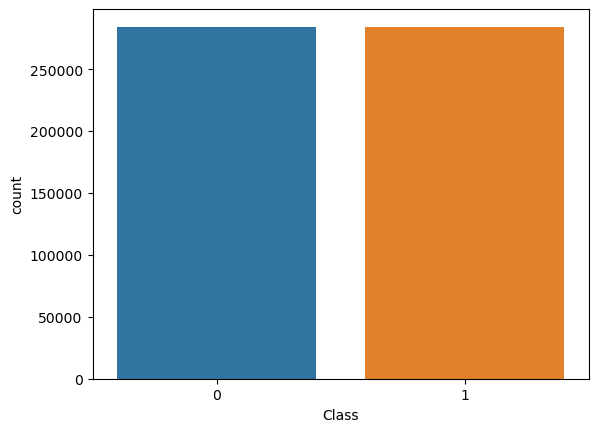

In [31]:
sns.countplot(x = 'Class' ,data = df)

## Seperate X and y

In [32]:
X = df.drop('Class', axis = 1)
y = df['Class']

## Divide the data into train_test_split

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Apply log reg on X_train, y_train

In [34]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [35]:
lr.fit(X_train, y_train)

LogisticRegression()

In [36]:
y_pred = lr.predict(X_test)

In [37]:
accuracy_score(y_pred, y_test)

0.9166065807291208

## UnderSampling the majority class

In [38]:
## import the resample module from sklearn

from sklearn.utils import resample
df_majority_undersampled = resample(df_majority, n_samples = 492, replace = True, random_state = 0)
df_majority_undersampled.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
118196,74987.0,1.527433,-0.461260,-0.834114,-1.028904,0.089216,-0.175688,-0.274290,-0.076280,-0.786820,...,0.097526,0.199935,-0.274765,-1.322760,0.851065,0.038527,-0.023607,-0.021650,1.00,0
152645,97429.0,1.936028,-0.391544,0.455258,0.673310,-1.217873,-0.703623,-0.940000,-0.103963,2.595080,...,-0.082077,0.169631,0.375442,0.434502,-0.669984,0.413046,-0.037385,-0.038219,14.95,0
122829,76703.0,1.212061,-0.366070,1.059187,-0.035950,-1.002583,0.047175,-0.811711,0.213515,0.856225,...,-0.092749,-0.091206,0.014558,0.091391,0.128617,0.993584,-0.036948,0.001613,1.00,0
86498,61260.0,-1.051204,1.075649,0.895192,1.175461,0.109368,0.474795,0.128613,0.676522,-0.574833,...,0.030416,0.305363,0.039111,-0.296289,-0.028537,-0.221573,0.198834,0.099191,19.09,0
211937,138636.0,-4.478412,-4.322205,-1.503282,-1.876924,-2.148060,-0.946421,1.117545,0.099251,0.136878,...,-0.624943,-1.553608,-0.626894,0.158920,-1.009544,-0.862611,0.217553,-0.464175,602.69,0


In [39]:
df_majority_undersampled.shape

(492, 31)

In [27]:
## Combine undersample majority dataframe with minority dataframe

In [40]:
df = pd.concat([df_majority_undersampled, df_minority])
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
118196,74987.0,1.527433,-0.461260,-0.834114,-1.028904,0.089216,-0.175688,-0.274290,-0.076280,-0.786820,...,0.097526,0.199935,-0.274765,-1.322760,0.851065,0.038527,-0.023607,-0.021650,1.00,0
152645,97429.0,1.936028,-0.391544,0.455258,0.673310,-1.217873,-0.703623,-0.940000,-0.103963,2.595080,...,-0.082077,0.169631,0.375442,0.434502,-0.669984,0.413046,-0.037385,-0.038219,14.95,0
122829,76703.0,1.212061,-0.366070,1.059187,-0.035950,-1.002583,0.047175,-0.811711,0.213515,0.856225,...,-0.092749,-0.091206,0.014558,0.091391,0.128617,0.993584,-0.036948,0.001613,1.00,0
86498,61260.0,-1.051204,1.075649,0.895192,1.175461,0.109368,0.474795,0.128613,0.676522,-0.574833,...,0.030416,0.305363,0.039111,-0.296289,-0.028537,-0.221573,0.198834,0.099191,19.09,0
211937,138636.0,-4.478412,-4.322205,-1.503282,-1.876924,-2.148060,-0.946421,1.117545,0.099251,0.136878,...,-0.624943,-1.553608,-0.626894,0.158920,-1.009544,-0.862611,0.217553,-0.464175,602.69,0


In [41]:
df.shape

(984, 31)

In [42]:
df['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

<Axes: xlabel='Class', ylabel='count'>

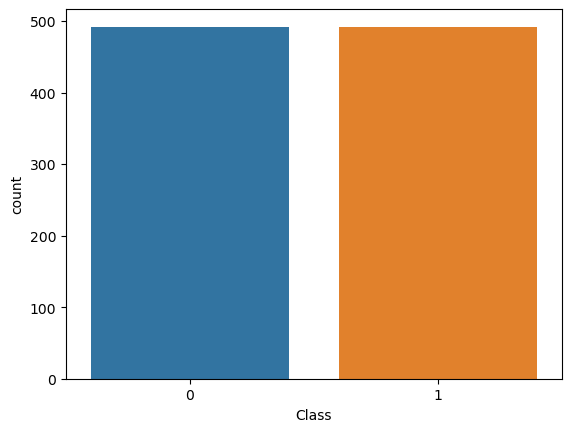

In [43]:
sns.countplot(x = 'Class' ,data = df)

## Seperate X and y

In [44]:
X = df.drop('Class', axis = 1)
y = df['Class']

## Divide the data into train_test_split

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Apply log reg on X_train, y_train

In [46]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [47]:
lr.fit(X_train, y_train)

LogisticRegression()

In [48]:
y_pred = lr.predict(X_test)

In [49]:
accuracy_score(y_pred, y_test)

0.8984771573604061